### Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [6]:
web = pd.read_csv("website_wata.csv")
#View the dataset
web

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


#### The web traffic dataset has 2000 rows and 7 columns

### Data Exploration

In [7]:
#show the top 5 rows
web.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [8]:
#show the last 5 rows
web.tail()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0
1999,3,0.882638,0.338026,Direct,5.186908,3,1.0


In [9]:
#Informaton about the data
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [10]:
#check for missing values
web.isna()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [11]:
web.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

#### There are no missing values

In [12]:
#check the statistical description of the dataset
web.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [13]:
#calculate the correlation between variables of type "int64" or "float64"
web.corr()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


### Data Visualization

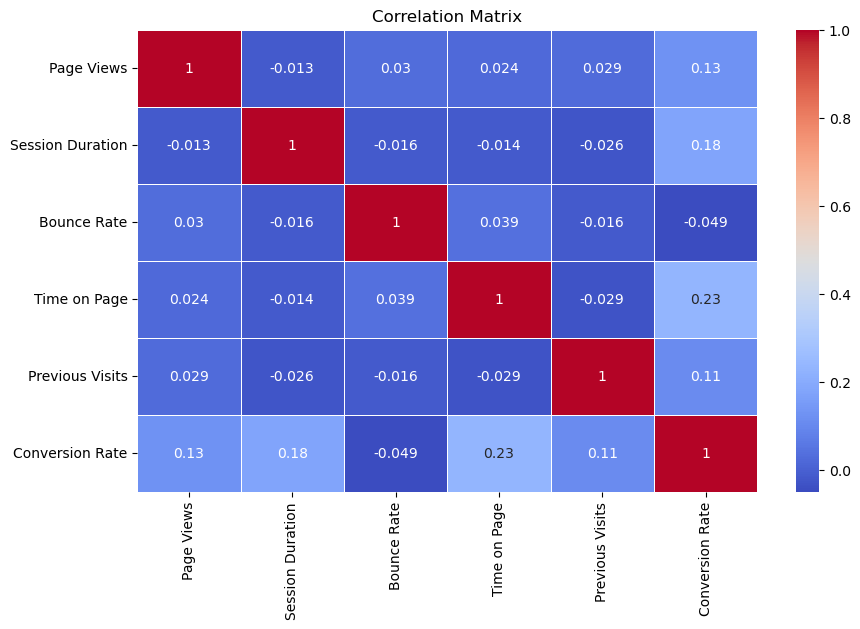

In [32]:
#Creating Heatmap chart
plt.figure(figsize=(10, 6))
sns.heatmap(web.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# creating new variables for data visualization
page_views = web['Page Views']
session_duration = web['Session Duration']

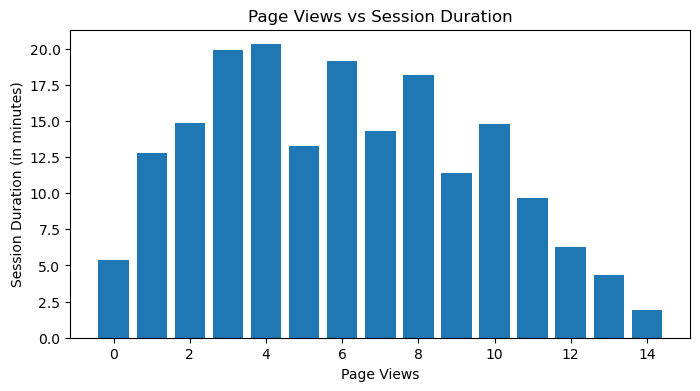

In [15]:
# creating a barchart
plt.figure(figsize=(8, 4))
plt.bar(page_views, session_duration)
plt.title('Page Views vs Session Duration')
plt.xlabel('Page Views')
plt.ylabel('Session Duration (in minutes)')
plt.show()

### Traffic Source Distribution

In [16]:
#traffic source value counts
traffic_counts = web['Traffic Source'].value_counts()
traffic_counts

Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: Traffic Source, dtype: int64

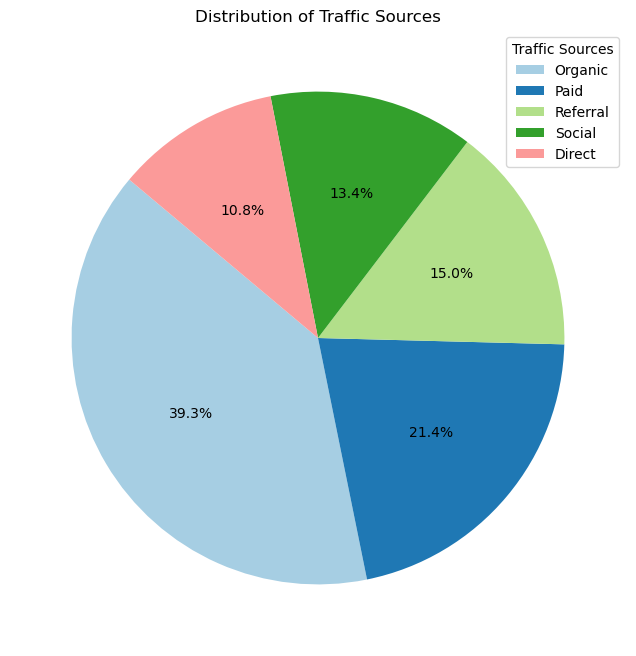

In [17]:
#creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(traffic_counts, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Distribution of Traffic Sources')

#legend
labels = ['Organic', 'Paid', 'Referral', 'Social', 'Direct']
plt.legend(labels, title="Traffic Sources", loc="best")

# Display the chart
plt.show()

### Time on page based on traffic sources

In [18]:
traffic_view = web['Traffic Source']
page_time = web['Time on Page']

In [19]:
# Group by 'source' and sum the visits
traffic_distribution = web.groupby('Traffic Source')['Time on Page'].sum()

# Display the values
print(traffic_distribution)


Traffic Source
Direct       852.993708
Organic     3126.703177
Paid        1749.201365
Referral    1199.337937
Social      1126.641884
Name: Time on Page, dtype: float64


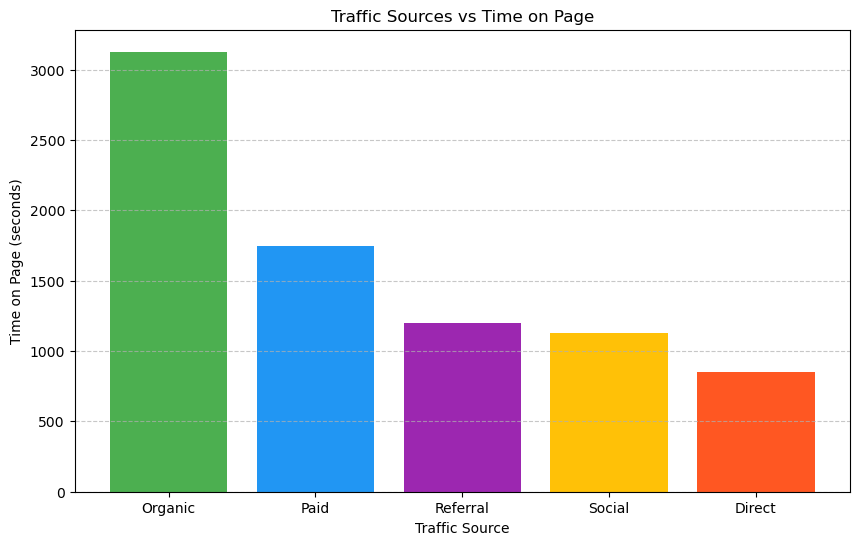

In [22]:
#Creating bar chat
plt.figure(figsize=(10, 6))
sorted_traffic = traffic_distribution.sort_values(ascending=False)
plt.bar(sorted_traffic.index, sorted_traffic.values, color=['#4CAF50', '#2196F3', '#9C27B0', '#FFC107', '#FF5722'])
plt.title('Traffic Sources vs Time on Page')
plt.xlabel('Traffic Source')
plt.ylabel('Time on Page (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conversion Rate based on traffic sources

In [ ]:
### Understanding user behavior patterns and optimizing the website accordingly.

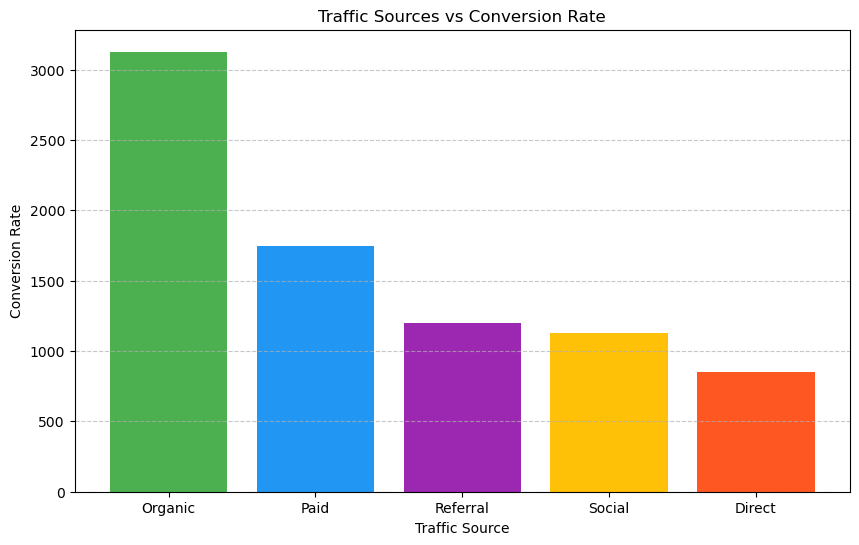

In [27]:
plt.figure(figsize=(10, 6))
sorted_traffic = traffic_distribution.sort_values(ascending=False)
plt.bar(sorted_traffic.index, sorted_traffic.values, color=['#4CAF50', '#2196F3', '#9C27B0', '#FFC107', '#FF5722'])
plt.title('Traffic Sources vs Conversion Rate')
plt.xlabel('Traffic Source')
plt.ylabel('Conversion Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Time spent on page and bounce rate relationship

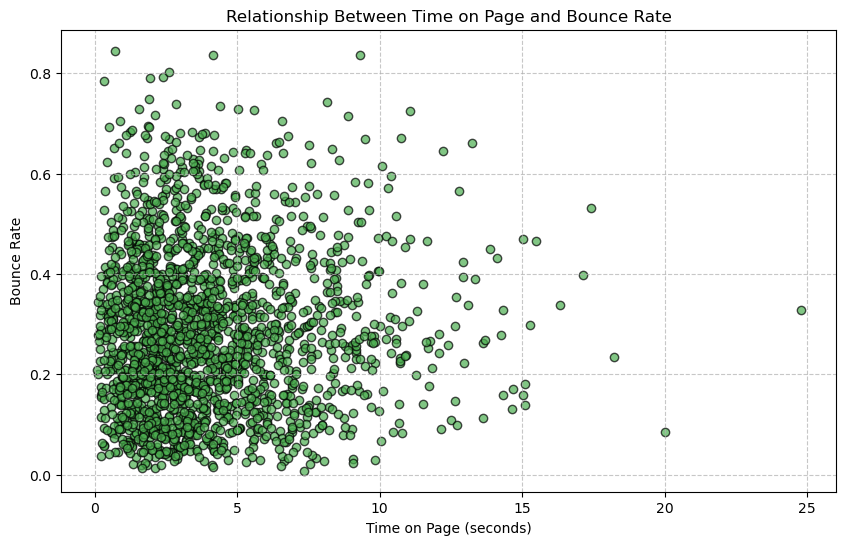

In [23]:
#Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(web['Time on Page'], web['Bounce Rate'], color='#4CAF50', alpha=0.7, edgecolors='black')

plt.title('Relationship Between Time on Page and Bounce Rate')
plt.xlabel('Time on Page (seconds)')
plt.ylabel('Bounce Rate')
plt.grid(linestyle='--', alpha=0.7)

plt.show()


### Time On Page And Conversion Rate Relationship 

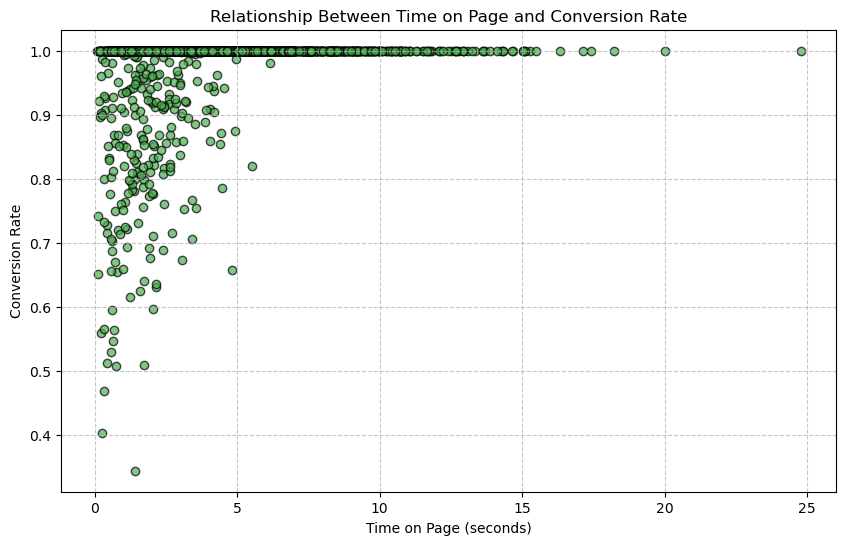

In [26]:
#Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(web['Time on Page'], web['Conversion Rate'], color='#4CAF50', alpha=0.7, edgecolors='black')

plt.title('Relationship Between Time on Page and Conversion Rate')
plt.xlabel('Time on Page (seconds)')
plt.ylabel('Conversion Rate')
plt.grid(linestyle='--', alpha=0.7)

plt.show()

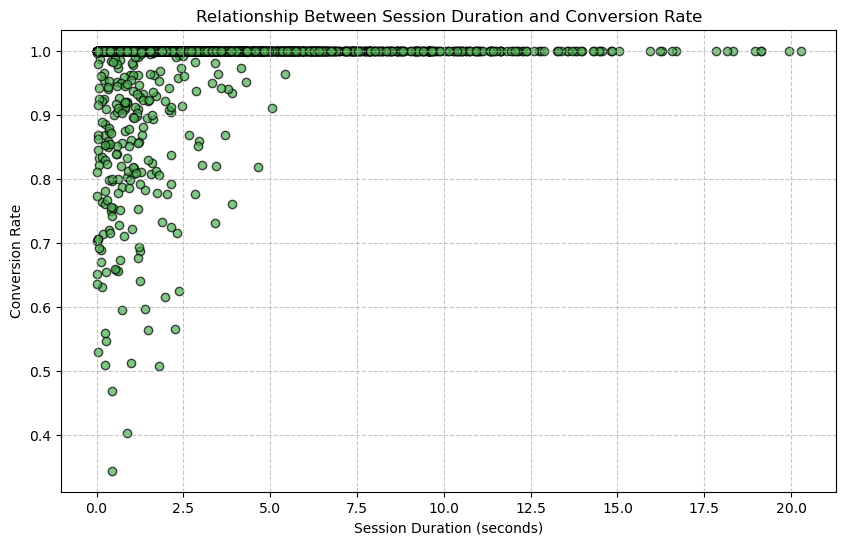

In [33]:
#Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(web['Session Duration'], web['Conversion Rate'], color='#4CAF50', alpha=0.7, edgecolors='black')

plt.title('Relationship Between Session Duration and Conversion Rate')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Conversion Rate')
plt.grid(linestyle='--', alpha=0.7)

plt.show()